In [138]:
!pip install --upgrade pip > /dev/null
!pip install prometheus-api-client > /dev/null
print("Done")

Done


In [139]:
from prometheus_api_client import Metric, MetricsList, PrometheusConnect
from prometheus_api_client.utils import parse_datetime, parse_timedelta

import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
pc = PrometheusConnect(url="https://prometheus-data-science-on-the-moc-openshift.k-apps.osh.massopen.cloud", disable_ssl=True)

In [141]:
start_time = parse_datetime("1d")
end_time = parse_datetime("now")
chunk_size = parse_timedelta("now", "1d")

metric_data = pc.get_metric_range_data(
    'process_cpu_seconds_total{app="jupyterhub",deployment="jupyterhub-4",deploymentconfig="jupyterhub",instance="10.128.5.18:8080",job="kubernetes-pods",kubernetes_namespace="data-science-on-the-moc-openshift",kubernetes_pod_name="jupyterhub-4-xdwnk"}',
    start_time=start_time,
    end_time=end_time,
    chunk_size=chunk_size,
)

/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [142]:
for metric in metric_data:
    print(metric["metric"], "\n")

{'__name__': 'process_cpu_seconds_total', 'app': 'jupyterhub', 'deployment': 'jupyterhub-4', 'deploymentconfig': 'jupyterhub', 'instance': '10.128.5.18:8080', 'job': 'kubernetes-pods', 'kubernetes_namespace': 'data-science-on-the-moc-openshift', 'kubernetes_pod_name': 'jupyterhub-4-xdwnk'} 



In [143]:
metrics_object_list = MetricsList(metric_data)
print(len(metrics_object_list))
for item in metrics_object_list:
    print(type(item))
    
for item in metrics_object_list:
    print(item.metric_name, item.label_config, "\n")

1
<class 'prometheus_api_client.metric.Metric'>
process_cpu_seconds_total {'app': 'jupyterhub', 'deployment': 'jupyterhub-4', 'deploymentconfig': 'jupyterhub', 'instance': '10.128.5.18:8080', 'job': 'kubernetes-pods', 'kubernetes_namespace': 'data-science-on-the-moc-openshift', 'kubernetes_pod_name': 'jupyterhub-4-xdwnk'} 



In [144]:
my_metric_object = metrics_object_list[0] # one of the metrics from the list
print(type(my_metric_object))

<class 'prometheus_api_client.metric.Metric'>


In [145]:
my_metric_object.metric_name

'process_cpu_seconds_total'

In [146]:
my_metric_object.metric_values

,ds,y
0,2020-03-24 10:00:09.864,6819.39
1,2020-03-24 10:01:09.864,6819.70
2,2020-03-24 10:02:09.864,6819.99
3,2020-03-24 10:03:09.864,6820.27
4,2020-03-24 10:04:09.864,6820.58
5,2020-03-24 10:05:09.864,6820.85
6,2020-03-24 10:06:09.864,6821.04
7,2020-03-24 10:07:09.864,6821.23
8,2020-03-24 10:08:09.864,6821.48
9,2020-03-24 10:09:09.864,6821.78


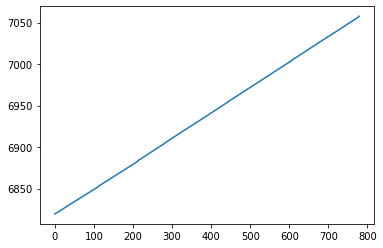

In [147]:
my_metric_object.metric_values.iloc[:,1].plot()